## Analyzing the Air bnb datasets for Seattle and Boston

### Part of the first project for DataScience Nanodegree from Udacity

### Data Scientist: Rafael Mata M.

### Date Created: 15 October 2020
### Last updated: 27 October 2020

#### Import the libraries 

In [571]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# if needed download stopwords and punkt

import nltk
nltk.download('stopwords')
nltk.download('punkt')

%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/rafaelmata357/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rafaelmata357/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Read the datasets

In [115]:
boston_dir = '/Users/rafaelmata357/Udacity/Data Science Nanodegree/Projects/Airbnb/Boston/'
seattle_dir = '/Users/rafaelmata357/Udacity/Data Science Nanodegree/Projects/Airbnb/Seattle/'

#### Boston Datasets

In [116]:
boston_df_listings = pd.read_csv(boston_dir+'listings.csv')
boston_df_calendar = pd.read_csv(boston_dir+'calendar.csv')
boston_df_reviews = pd.read_csv(boston_dir+'reviews.csv')
print('Boston datasets read...')

Boston datasets read...


#### Seattle Datasets

In [117]:
seattle_df_listings = pd.read_csv(seattle_dir+'listings.csv')
seattle_df_calendar = pd.read_csv(seattle_dir+'calendar.csv')
seattle_df_reviews = pd.read_csv(seattle_dir+'reviews.csv')
print('Seattle datasets read...')

Seattle datasets read...


## DATA UNDERSTANDING

There is three datasets:
    
- listings: contains the list of airbnb's houses in the Boston and Seattle area
- calendar: the availabily of houses
- reviews: Reviews for the houses

The datasets can be found here

#### Datasets shapes

In [462]:
print('BOSTON datasets Shape')
print('Listings dataset: {}'.format(boston_df_listings.shape))
print('Calendar dataset: {}'.format(boston_df_calendar.shape))
print('Reviews dataset: {}'.format(boston_df_reviews.shape))

BOSTON datasets Shape
Listings dataset: (3585, 95)
Calendar dataset: (1308890, 7)
Reviews dataset: (68275, 9)


In [463]:
print('SEATTLE datasets Shape')
print('Listings dataset: {}'.format(seattle_df_listings.shape))
print('Calendar dataset: {}'.format(seattle_df_calendar.shape))
print('Reviews dataset: {}'.format(seattle_df_reviews.shape))

SEATTLE datasets Shape
Listings dataset: (3818, 92)
Calendar dataset: (1393570, 7)
Reviews dataset: (84849, 9)


In [556]:
boston_df_reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments,month,year,dayofweek
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place w...,5,2013,1
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both ai...,5,2013,2
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay...,6,2013,3
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clea...,6,2013,5
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 min...,6,2013,6


In [557]:
boston_df_calendar.head(5)

,listing_id,date,available,price,month,year,dayofweek
0,12147973,2017-09-05,f,NaN,9,2017,1
1,12147973,2017-09-04,f,NaN,9,2017,0
2,12147973,2017-09-03,f,NaN,9,2017,6
3,12147973,2017-09-02,f,NaN,9,2017,5
4,12147973,2017-09-01,f,NaN,9,2017,4


In [563]:
pd.set_option('display.max_columns', None)
pd.set_option('max_colwidth', 20)
boston_df_listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airb...,20160906204935,2016-09-07,Sunny Bungalow i...,"Cozy, sunny, fam...",The house has an...,"Cozy, sunny, fam...",none,Roslindale is qu...,NaN,The bus stop is ...,You will have ac...,NaN,Clean up and tre...,https://a2.musca...,https://a2.musca...,https://a2.musca...,https://a2.musca...,31303940,https://www.airb...,Virginia,2015-04-15,"Boston, Massachu...",We are country a...,NaN,NaN,NaN,f,https://a2.musca...,https://a2.musca...,Roslindale,1,1,"['email', 'phone...",t,f,"Birch Street, Bo...",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.282619,-71.133068,t,House,Entire home/apt,4,1.5,2.0,3.0,Real Bed,"{TV,""Wireless In...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airb...,20160906204935,2016-09-07,Charming room in...,Charming and qui...,Small but cozy a...,Charming and qui...,none,The room is in R...,If you don't hav...,Plenty of safe s...,Apt has one more...,"If I am at home,...",Pet friendly but...,https://a1.musca...,https://a1.musca...,https://a1.musca...,https://a1.musca...,2572247,https://www.airb...,Andrea,2012-06-07,"Boston, Massachu...",I live in Boston...,within an hour,100%,100%,f,https://a2.musca...,https://a2.musca...,Roslindale,1,1,"['email', 'phone...",t,t,Pinehurst Street...,Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.286241,-71.134374,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wi...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airb...,20160906204935,2016-09-07,Mexican Folk Art...,Come stay with a...,Come stay with a...,Come stay with a...,none,The LOCATION: Ro...,I am in a scenic...,PUBLIC TRANSPORT...,I am living in t...,ABOUT ME: I'm a ...,I encourage you ...,https://a2.musca...,https://a2.musca...,https://a2.musca...,https://a2.musca...,16701,https://www.airb...,Phil,2009-05-11,"Boston, Massachu...",I am a middle-ag...,within a few hours,100%,88%,t,https://a2.musca...,https://a2.musca...,Roslindale,1,1,"['email', 'phone...",t,t,"Ardale St., Bost...",Roslindale,Roslindale,NaN,Boston,MA,02131,Boston,"Boston, MA",US,United States,42.292438,-71.135765,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",""...",NaN,$65.00,$395.00,"$1,350.00",NaN,NaN,1,$20.00,3,45,5 days ago,NaN,19,46,61,319,2016-09-06,41,2009-07-

### Select the features from listings that are  going to be considered in the analysis

In [519]:
listings_features = ['id', 'neighborhood_overview', 'transit', 'host_response_rate', 'host_acceptance_rate', 
                     'neighbourhood_cleansed', 'zipcode', 'latitude', 'longitude', 'property_type', 'room_type', 
                     'accommodates','bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities','price', 'guests_included', 
                     'extra_people', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness',
                     'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 
                     'cancellation_policy', 'reviews_per_month']

In [520]:
boston_df2_listings = boston_df_listings[listings_features]
seattle_df2_listings = seattle_df_listings[listings_features]

#### Nan values in the datasets

In [544]:
boston_nulls_listings = boston_df2_listings.isnull().sum()/boston_df_listings.shape[0]*100
boston_nulls_calendar = boston_df_calendar.isnull().sum()/boston_df_calendar.shape[0]*100
boston_nulls_reviews  = boston_df_reviews.isnull().sum()/boston_df_reviews.shape[0]*100


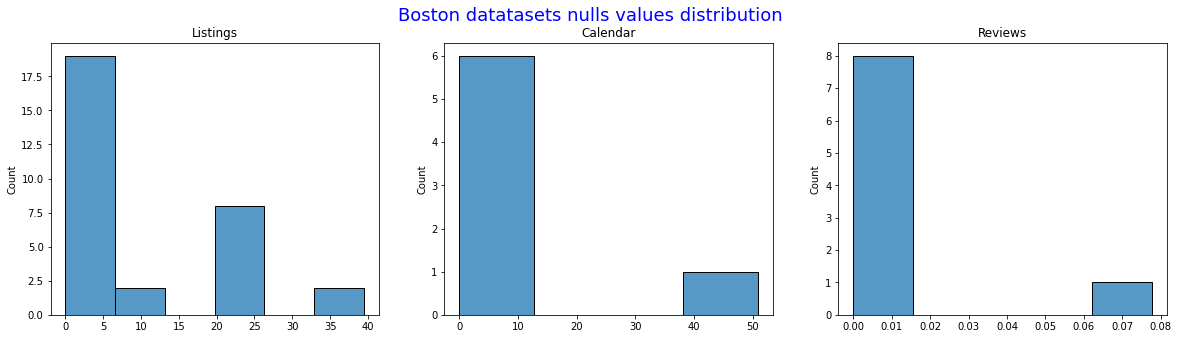

In [545]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5)) 
fig.suptitle('Boston datatasets nulls values distribution', fontsize=18, c='b')
#boston_nulls_listings.hist(ax=ax[0])
sns.histplot(data=boston_nulls_listings,x=boston_nulls_listings.values ,discrete=False,ax=ax[0])
sns.histplot(data=boston_nulls_calendar,x=boston_nulls_calendar.values ,discrete=False,ax=ax[1])
sns.histplot(data=boston_nulls_reviews,x=boston_nulls_reviews.values ,discrete=False,ax=ax[2])
ax[0].set_title('Listings')
ax[1].set_title('Calendar')
ax[2].set_title('Reviews');

In [546]:
seattle_nulls_listings = seattle_df2_listings.isnull().sum()/seattle_df_listings.shape[0]*100
seattle_nulls_calendar = seattle_df_calendar.isnull().sum()/seattle_df_calendar.shape[0]*100
seattle_nulls_reviews  = seattle_df_reviews.isnull().sum()/seattle_df_reviews.shape[0]*100

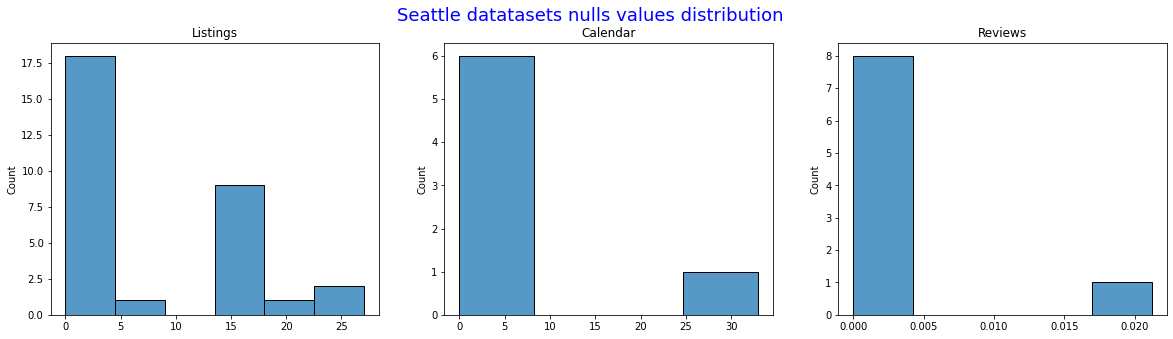

In [547]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20,5)) 
fig.suptitle('Seattle datatasets nulls values distribution', fontsize=18, c='b')

sns.histplot(data=seattle_nulls_listings,x=seattle_nulls_listings.values ,discrete=False,ax=ax[0])
sns.histplot(data=seattle_nulls_calendar,x=seattle_nulls_calendar.values ,discrete=False,ax=ax[1])
sns.histplot(data=seattle_nulls_reviews,x=seattle_nulls_reviews.values ,discrete=False,ax=ax[2])
ax[0].set_title('Listings')
ax[1].set_title('Calendar')
ax[2].set_title('Reviews');

### It looks that in both cities Seattle and Boston the Listings datasets have the more columns with Nan values

#### Columns with more than 20% Nan Values

In [553]:
print('BOSTON')
print('Listings dataset columns with more than 20% Nan values')
boston_df2_listings.columns[boston_nulls_listings >= 20]

BOSTON
Listings dataset columns with more than 20% Nan values


Index(['neighborhood_overview', 'transit', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'reviews_per_month'],
      dtype='object')

In [554]:
print('SEATTLE')
print('Listings dataset columns with more than 20% Nan values')
seattle_df2_listings.columns[seattle_nulls_listings >= 20]

SEATTLE
Listings dataset columns with more than 20% Nan values


Index(['neighborhood_overview', 'transit', 'host_acceptance_rate'], dtype='object')

## Data Cleaning and preprocessing

### Convert date columns to year, month, week, dayofWeek

In [207]:
boston_df_calendar['month'] = pd.to_datetime(boston_df_calendar['date']).dt.month
boston_df_calendar['year'] = pd.to_datetime(boston_df_calendar['date']).dt.year
boston_df_calendar['dayofweek'] = pd.to_datetime(boston_df_calendar['date']).dt.dayofweek

In [208]:
seattle_df_calendar['month'] = pd.to_datetime(seattle_df_calendar['date']).dt.month
seattle_df_calendar['year'] = pd.to_datetime(seattle_df_calendar['date']).dt.year
seattle_df_calendar['dayofweek'] = pd.to_datetime(seattle_df_calendar['date']).dt.dayofweek

In [248]:
boston_df_reviews['month'] = pd.to_datetime(boston_df_reviews['date']).dt.month
boston_df_reviews['year'] = pd.to_datetime(boston_df_reviews['date']).dt.year
boston_df_reviews['dayofweek'] = pd.to_datetime(boston_df_reviews['date']).dt.dayofweek

In [250]:
seattle_df_reviews['month'] = pd.to_datetime(seattle_df_reviews['date']).dt.month
seattle_df_reviews['year'] = pd.to_datetime(seattle_df_reviews['date']).dt.year
seattle_df_reviews['dayofweek'] = pd.to_datetime(seattle_df_reviews['date']).dt.dayofweek

### Using the NLTK library, preprocessing the text columns to extract some features to include in the model

Based on [this](https://towardsdatascience.com/getting-started-with-text-analysis-in-python-ca13590eb4f7) article from **medium** to use the NLTK

In [559]:
# Function to preprocess the text columns a eliminate word stoppers and puntuantion 

import re
from nltk.stem import WordNetLemmatizer, PorterStemmer, SnowballStemmer
 

def preprocess(raw_text):
    
    #regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split into words -> convert string into list ( 'hello world' -> ['hello', 'world'])
    words = letters_only_text.lower().split()

    cleaned_words = []
    lemmatizer = PorterStemmer() #plug in here any other stemmer or lemmatiser you want to try out
    
    # remove stopwords
    for word in words:
        if word not in stop_words:
            cleaned_words.append(word)
    
    # stemm or lemmatise words
    stemmed_words = []
    for word in cleaned_words:
        word = lemmatizer.stem(word)   #dont forget to change stem to lemmatize if you are using a lemmatizer
        stemmed_words.append(word)
    
    # converting list back to string
    return " ".join(stemmed_words)

In [565]:
# Copy the text columns to analyze into a new dataframe

df = boston_listings_df2[['neighborhood_overview','transit','amenities']].copy()

## Convert to string this columns 
df['transit_str'] = df['transit'].astype(str)
df['amenities_str'] = df['amenities'].astype(str)
df['neighborhood_str'] = df['neighborhood_overview'].astype(str)

# Convert to tokens the columns

df['amenities_token'] = df['amenities_str'].apply(preprocess)
df['neighborhood_token'] = df['neighborhood_str'].apply(preprocess)
df['transit_token'] = df['transit_str'].apply(preprocess)



In [567]:
# Most commong words
print('Most amenities column common words')
from collections import Counter
Counter(" ".join(df["amenities_token"]).split()).most_common(10)


Most amenities column common words


[('internet', 5998),
 ('detector', 5353),
 ('tv', 4377),
 ('dryer', 4289),
 ('wireless', 4260),
 ('friendli', 3722),
 ('heat', 3384),
 ('kitchen', 3284),
 ('smoke', 3006),
 ('essenti', 2994)]

In [568]:
# Most commong words
print('Most transit column common words')
from collections import Counter
Counter(" ".join(df["transit_token"]).split()).most_common(10)

Most transit column common words


[('walk', 2416),
 ('minut', 2382),
 ('line', 2240),
 ('boston', 1766),
 ('station', 1691),
 ('nan', 1290),
 ('park', 1254),
 ('bu', 1191),
 ('stop', 1142),
 ('street', 1053)]

In [569]:
# Most commong words
print('Most neighborhood column common words')
from collections import Counter
Counter(" ".join(df["neighborhood_token"]).split()).most_common(10)

Most neighborhood column common words


[('boston', 2575),
 ('walk', 1593),
 ('neighborhood', 1544),
 ('restaur', 1471),
 ('nan', 1415),
 ('street', 1013),
 ('shop', 916),
 ('park', 896),
 ('locat', 778),
 ('minut', 765)]

In [ ]:
#nice library to produce wordclouds



all_words = '' 

#looping through all incidents and joining them to one text, to extract most common words
for arg in df["amenities_token"]: 

    tokens = arg.split()  
      
    all_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (5, 5), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

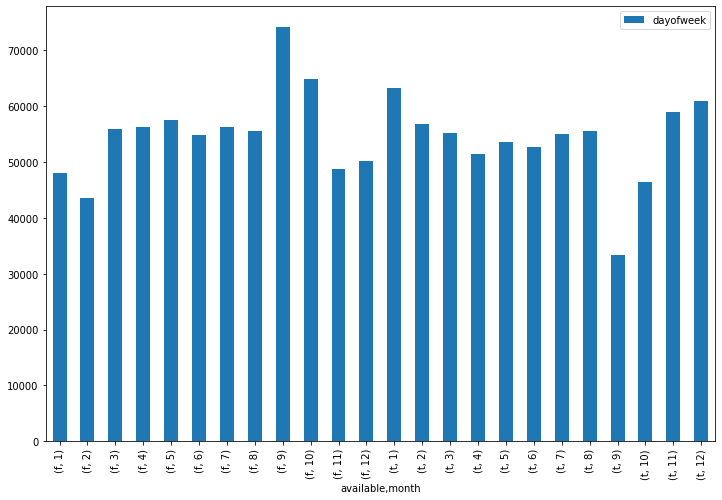

In [188]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
month_b.plot.bar(ax=ax);

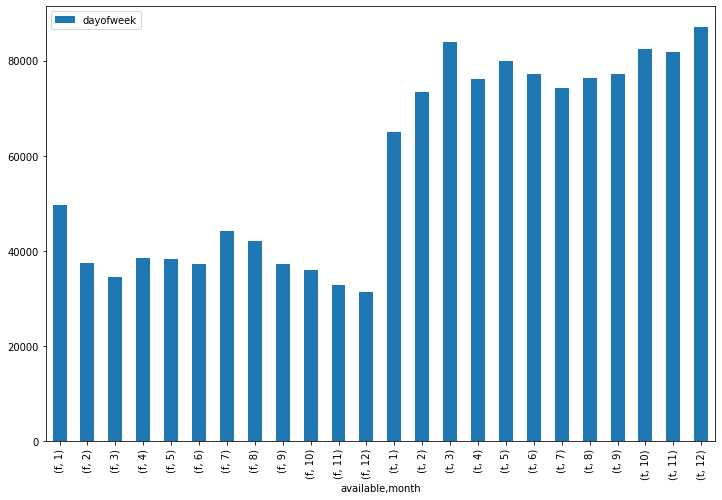

In [189]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
month_s.plot.bar(ax=ax);

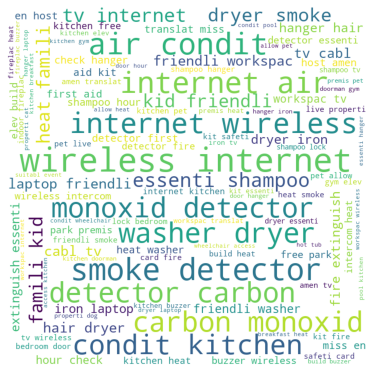